In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

In [2]:
from statsmodels.graphics.api import qqplot

In [3]:
df_influenza = pd.read_csv('data/influenza_cases_ch.csv', parse_dates=['date'])
df_influenza.set_index('date', inplace=True)

In [4]:
df_influenza.index.freq = df_influenza.index.inferred_freq

In [14]:
# interpolate missing weeks
df_influenza = df_influenza.resample('W').mean().interpolate()

<Axes: xlabel='date'>

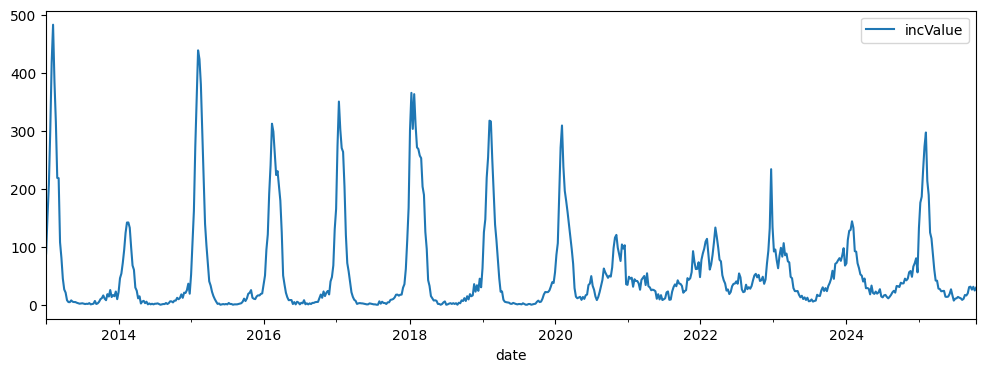

In [20]:
df_influenza.plot(figsize=(12, 4))

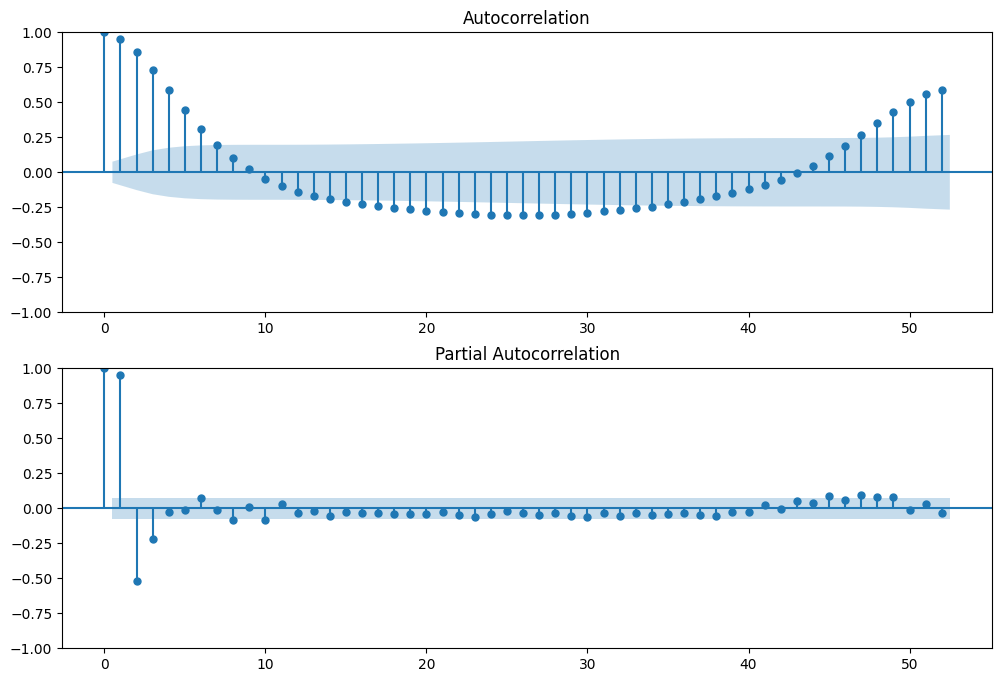

In [30]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_influenza.values.squeeze(), lags=52, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_influenza, lags=52, ax=ax2)

## ARIMA Testing

In [71]:
arma_mod50 = ARIMA(df_influenza, order=(4, 0, 0)).fit()
print(arma_mod50.params)

const      55.427368
ar.L1       1.323170
ar.L2      -0.202211
ar.L3      -0.181672
ar.L4      -0.033463
sigma2    415.878651
dtype: float64


In [72]:
print(arma_mod50.aic, arma_mod50.bic, arma_mod50.hqic)

5939.153577605708 5966.179306646928 5949.623117746368


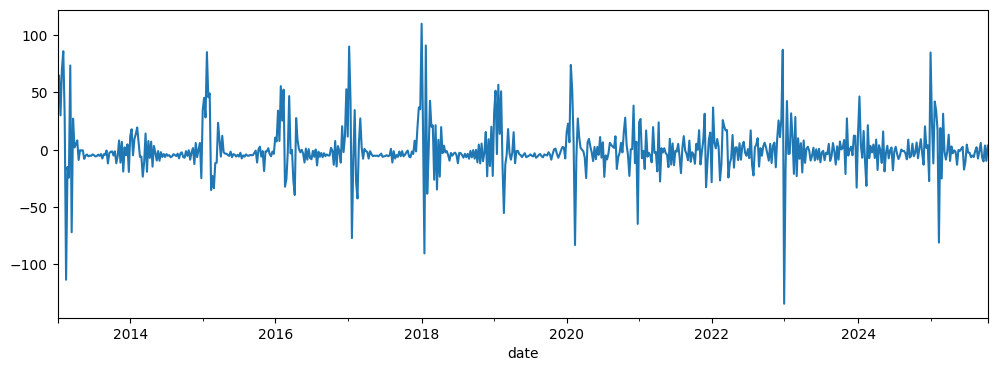

In [75]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax = arma_mod50.resid.plot(ax=ax)

In [51]:
arma_mod30 = ARIMA(df_influenza, order=(4, 0, 0)).fit()
print(arma_mod30.params)

const      55.427368
ar.L1       1.323170
ar.L2      -0.202211
ar.L3      -0.181672
ar.L4      -0.033463
sigma2    415.878651
dtype: float64


In [32]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

5939.153577605708 5966.179306646928 5949.623117746368


In [33]:
sm.stats.durbin_watson(arma_mod30.resid.values)

np.float64(1.985905719106613)

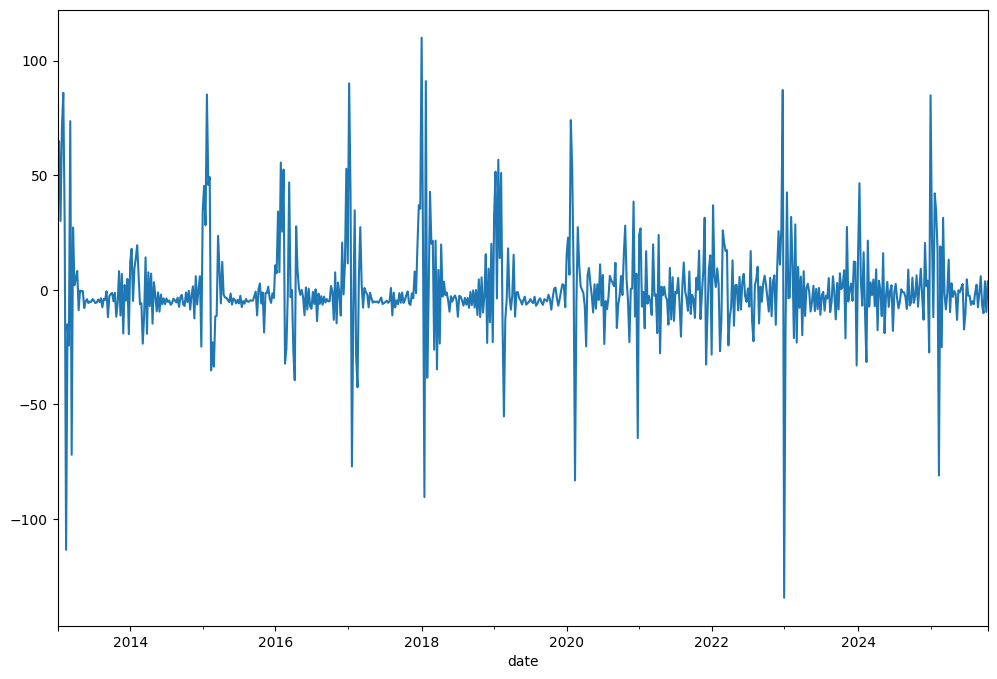

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

In [35]:
stats.normaltest(arma_mod30.resid)

NormaltestResult(statistic=np.float64(136.22904511075782), pvalue=np.float64(2.6196225288682668e-30))

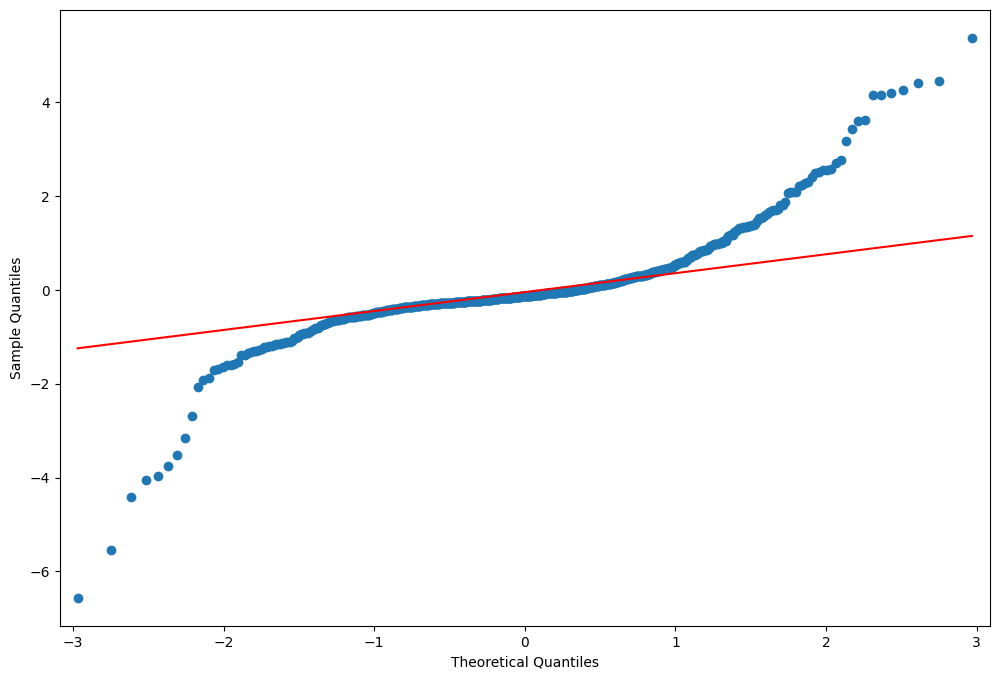

In [36]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod30.resid, line="q", ax=ax, fit=True)

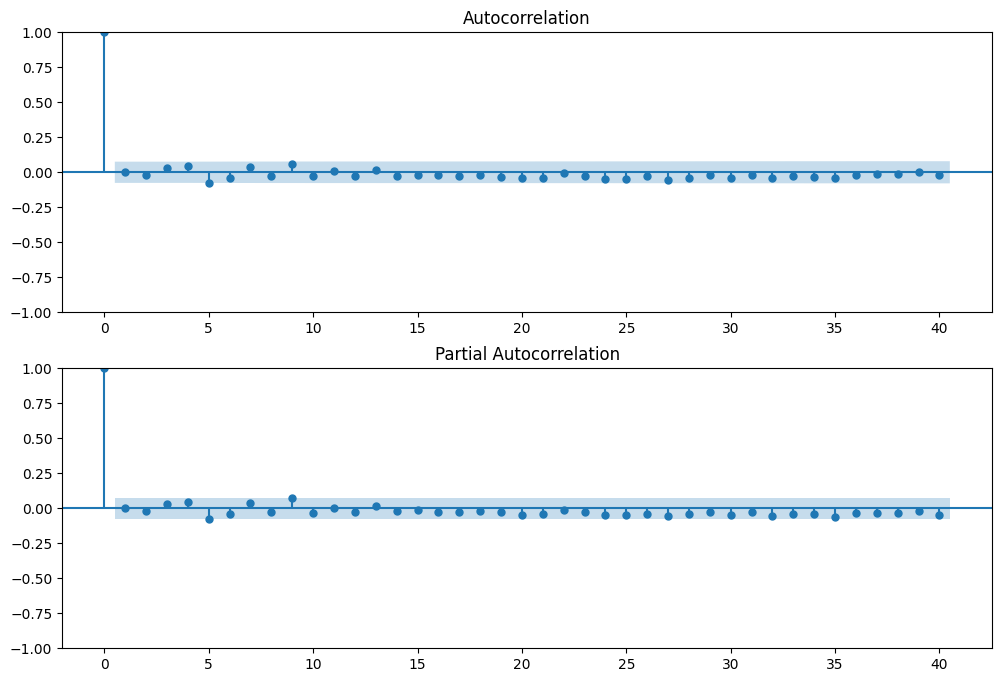

In [29]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod30.resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod30.resid, lags=40, ax=ax2)